In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7be5de94-9cd7-4401-a29d-c401aebf3fbc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-07T00:37:57.824Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 8983}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10486, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

# Displays the max column and not just a few
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950608e+07,1.950608e+07,False,NaN,1,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,27919.539438,1.358833e+10,14.6533,-0.047989,1.666114,3.751704,8.467063,-4.267209,-7.883903,5.446006e+11,49.7257,5.863103e+11,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00
1,1027,Ethereum,ETH,ethereum,7491,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202444e+08,1.202444e+08,True,NaN,2,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,1646.904080,4.919195e+09,-8.7987,0.113769,1.844377,-1.345725,0.903218,-9.842647,-11.885730,1.980311e+11,18.0765,1.980311e+11,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00
2,825,Tether USDt,USDT,tether,63223,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336690e+10,8.642571e+10,True,NaN,3,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,1.000504,1.916483e+10,1.9268,0.007543,0.039985,0.052377,0.104928,0.156923,0.054133,8.340889e+10,7.6151,8.646924e+10,NaN,2023-10-07T00:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-06 22:23:49.790904+00:00
3,1839,BNB,BNB,bnb,1662,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538459e+08,1.538459e+08,False,NaN,4,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,213.765581,2.736362e+08,-22.3550,0.169061,1.229805,-0.744311,-0.590911,-11.542076,-9.583001,3.288696e+10,3.0028,3.288696e+10,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.338730e+10,9.998838e+10,False,NaN,5,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,0.525518,6.801415e+08,-16.5165,-0.142558,0.376381,1.569274,4.757932,-15.463926,11.605115,2.805598e+10,2.5610,5.255179e+10,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00


In [5]:
# Automating the process

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7be5de94-9cd7-4401-a29d-c401aebf3fbc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df2 = pd.json_normalize(data['data'])
df2['timestamp'] = pd.to_datetime('now')
df = df.append[df2]

if not os.path.isfile(r'C:\Users\MY PC\Desktop\datasets\API.csv'):
    df.to_csv(r'C:\Users\MY PC\Desktop\datasets\API.csv', header='column_names')

{'status': {'timestamp': '2023-10-07T00:38:22.889Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 8983}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10486, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\ana\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


TypeError: 'method' object is not subscriptable

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api_runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19506075.00000,19506075.00000,False,NaN,1,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,27919.53944,13588327252.03117,14.65330,-0.04799,1.66611,3.75170,8.46706,-4.26721,-7.88390,544600630234.26794,49.72570,586310328188.51001,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00
1,1027,Ethereum,ETH,ethereum,7491,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120244439.39826,120244439.39826,True,NaN,2,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,1646.90408,4919194609.60926,-8.79870,0.11377,1.84438,-1.34572,0.90322,-9.84265,-11.88573,198031057784.07275,18.07650,198031057784.07001,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00
2,825,Tether USDt,USDT,tether,63223,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83366897433.59711,86425711834.21460,True,NaN,3,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,1.00050,19164834649.29326,1.92680,0.00754,0.03999,0.05238,0.10493,0.15692,0.05413,83408887023.49529,7.61510,86469242063.94000,NaN,2023-10-07T00:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-06 22:23:49.790904+00:00
3,1839,BNB,BNB,bnb,1662,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153845911.01345,153845911.01345,False,NaN,4,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,213.76558,273636222.21591,-22.35500,0.16906,1.22981,-0.74431,-0.59091,-11.54208,-9.58300,32886960627.18289,3.00280,32886960627.18000,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53387299665.00000,99988380689.00000,False,NaN,5,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,0.52552,680141529.84617,-16.51650,-0.14256,0.37638,1.56927,4.75793,-15.46393,11.60511,28055979217.20165,2.56100,52551785524.37000,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00
5,3408,USDC,USDC,usd-coin,14332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25498898332.36741,25498898332.36741,False,NaN,6,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,1.00005,2586367648.32753,-2.93850,0.01150,0.01074,-0.00207,0.00008,-0.00893,0.02148,25500090927.36321,2.32780,25500090927.36000,NaN,2023-10-07T00:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-06 22:23:49.790904+00:00
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,414107393.79726,559158171.42437,True,NaN,7,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,23.58701,401624453.59751,12.13960,0.89748,2.75809,16.05925,20.36375,2.00975,8.49183,9767555709.66833,0.89160,13188870017.08000,NaN,2023-10-07T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 22:23:49.790904+00:00
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35148542056.44300,36229014789.87600,False,NaN,8,NaN,NaN,NaN,2023-10-07T00:35:00.000Z,0.26517,94508013.96434,-8.70380,0.27600,1.32521,6.10420,2.91702,-8.69891,-8.96534,9320401392.13912,0.85090,11932730011.18000,NaN,2023-10-07T00:35:00.0

In [8]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04799,1.66611,3.75170,8.46706,-4.26721,-7.88390
Ethereum,0.11377,1.84438,-1.34572,0.90322,-9.84265,-11.88573
Tether USDt,0.00754,0.03999,0.05238,0.10493,0.15692,0.05413
BNB,0.16906,1.22981,-0.74431,-0.59091,-11.54208,-9.58300
XRP,-0.14256,0.37638,1.56927,4.75793,-15.46393,11.60511
USDC,0.01150,0.01074,-0.00207,0.00008,-0.00893,0.02148
Solana,0.89748,2.75809,16.05925,20.36375,2.00975,8.49183
Cardano,0.27600,1.32521,6.10420,2.91702,-8.69891,-8.96534
Dogecoin,0.21651,0.79690,-1.10319,-3.18740,-16.12436,-6.47665


In [9]:
df4 = df3.stack()
df4

name                                           
Bitcoin            quote.USD.percent_change_1h     -0.04799
                   quote.USD.percent_change_24h     1.66611
                   quote.USD.percent_change_7d      3.75170
                   quote.USD.percent_change_30d     8.46706
                   quote.USD.percent_change_60d    -4.26721
                   quote.USD.percent_change_90d    -7.88390
Ethereum           quote.USD.percent_change_1h      0.11377
                   quote.USD.percent_change_24h     1.84438
                   quote.USD.percent_change_7d     -1.34572
                   quote.USD.percent_change_30d     0.90322
                   quote.USD.percent_change_60d    -9.84265
                   quote.USD.percent_change_90d   -11.88573
Tether USDt        quote.USD.percent_change_1h      0.00754
                   quote.USD.percent_change_24h     0.03999
                   quote.USD.percent_change_7d      0.05238
                   quote.USD.percent_change_30d     

In [10]:
type(df4)

pandas.core.series.Series

In [11]:
df5 = df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.04799
                  quote.USD.percent_change_24h   1.66611
                  quote.USD.percent_change_7d    3.75170
                  quote.USD.percent_change_30d   8.46706
                  quote.USD.percent_change_60d  -4.26721
                  quote.USD.percent_change_90d  -7.88390
Ethereum          quote.USD.percent_change_1h    0.11377
                  quote.USD.percent_change_24h   1.84438
                  quote.USD.percent_change_7d   -1.34572
                  quote.USD.percent_change_30d   0.90322
                  quote.USD.percent_change_60d  -9.84265
                  quote.USD.percent_change_90d -11.88573
Tether USDt       quote.USD.percent_change_1h    0.00754
                  quote.USD.percent_change_24h   0.03999
                  quote.USD.percent_change_7d    0.05238
                  quote.USD.percent_change_30d   0.10493
                  quote.USD.percent_change_60d   0.15692
                  quote.USD.percent_change_90d   0.05413
BNB               quote.USD.percent_change_1h    0.16906
                  quote.USD.percent_change_24h   1.22981
                  quote.USD.percent_change_7d   -0.74431
                  quote.USD.percent_change_30d  -0.59091
                  quote.USD.percent_change_60d -11.54208
                  quote.USD.percent_change_90d  -9.58300
XRP               quote.USD.percent_change_1h   -0.14256
                  quote.USD.percent_change_24h   0.37638
                  quote.USD.percent_change_7d    1.56927
                  quote.USD.percent_change_30d   4.75793
                  quote.USD.percent_change_60d -15.46393
                  quote.USD.percent_change_90d  11.60511
USDC              quote.USD.percent_change_1h    0.01150
                  quote.USD.percent_change_24h   0.01074
                  quote.USD.percent_change_7d   -0.00207
                  quote.USD.percent_change_30d   0.00008
                  quote.USD.percent_change_60d  -0.00893
                  quote.USD.percent_change_90d   0.02148
Solana            quote.USD.percent_change_1h    0.89748
                  quote.USD.percent_change_24h   2.75809
                  quote.USD.percent_change_7d   16.05925
                  quote.USD.percent_change_30d  20.36375
                  quote.USD.percent_change_60d   2.00975
                  quote.USD.percent_change_90d   8.49183
Cardano           quote.USD.percent_change_1h    0.27600
                  quote.USD.percent_change_24h   1.32521
                  quote.USD.percent_change_7d    6.10420
                  quote.USD.percent_change_30d   2.91702
                  quote.USD.percent_change_60d  -8.69891
                  quote.USD.percent_change_90d  -8.96534
Dogecoin          quote.USD.percent_change_1h    0.21651
                  quote.USD.percent_change_24h   0.79690
                  quote.USD.percent_change_7d   -1.10319
                  quote.USD.percent_change_30d  -3.18740
                  quote.USD.percent_change_60d -16.12436
                  quote.USD.percent_change_90d  -6.47665
TRON              quote.USD.percent_change_1h    0.46782
                  quote.USD.percent_change_24h  -0.98072
                  quote.USD.percent_change_7d   -1.95136
                  quote.USD.percent_change_30d  10.85851
                  quote.USD.percent_change_60d  14.06437
                  quote.USD.percent_change_90d   9.31043
Toncoin           quote.USD.percent_change_1h    0.05719
                  quote.USD.percent_change_24h   4.10959
                  quote.USD.percent_change_7d   -1.22484
                  quote.USD.percent_change_30d  17.95532
                  quote.USD.percent_change_60d  78.38374
                  quote.USD.percent_change_90d  55.54938
Dai               quote.USD.percent_change_1h    0.03233
                  quote.USD.percent_change_24h   0.01336
                  quote.USD.percent_change_7d   -0.01478
   

In [12]:
df5.count()

values    300
dtype: int64

In [13]:
index = pd.Index(range(300))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04799
1,Bitcoin,quote.USD.percent_change_24h,1.66611
2,Bitcoin,quote.USD.percent_change_7d,3.75170
3,Bitcoin,quote.USD.percent_change_30d,8.46706
4,Bitcoin,quote.USD.percent_change_60d,-4.26721
5,Bitcoin,quote.USD.percent_change_90d,-7.88390
6,Ethereum,quote.USD.percent_change_1h,0.11377
7,Ethereum,quote.USD.percent_change_24h,1.84438
8,Ethereum,quote.USD.percent_change_7d,-1.34572
9,Ethereum,quote.USD.percent_change_30d,0.90322


In [14]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04799
1,Bitcoin,quote.USD.percent_change_24h,1.66611
2,Bitcoin,quote.USD.percent_change_7d,3.75170
3,Bitcoin,quote.USD.percent_change_30d,8.46706
4,Bitcoin,quote.USD.percent_change_60d,-4.26721
5,Bitcoin,quote.USD.percent_change_90d,-7.88390
6,Ethereum,quote.USD.percent_change_1h,0.11377
7,Ethereum,quote.USD.percent_change_24h,1.84438
8,Ethereum,quote.USD.percent_change_7d,-1.34572
9,Ethereum,quote.USD.percent_change_30d,0.90322


In [15]:
df7['percent_change'] = df7['percent_change'].replace('quote.USD.percent_change_', '', regex=True)
df7.head(30)

,name,percent_change,values
0,Bitcoin,1h,-0.04799
1,Bitcoin,24h,1.66611
2,Bitcoin,7d,3.75170
3,Bitcoin,30d,8.46706
4,Bitcoin,60d,-4.26721
5,Bitcoin,90d,-7.88390
6,Ethereum,1h,0.11377
7,Ethereum,24h,1.84438
8,Ethereum,7d,-1.34572
9,Ethereum,30d,0.90322


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

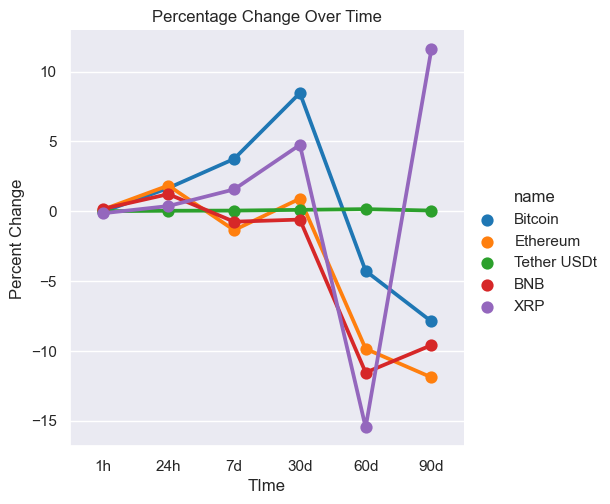

In [46]:
sns.set_theme(style="darkgrid")
palette = sns.color_palette("tab10", n_colors=10)
sns.catplot(x='percent_change', 
            y='values', hue='name', 
            data=df7.head(30), kind='point', palette=palette)
plt.title('Percentage Change Over Time')
plt.xlabel("TIme")
plt.ylabel("Percent Change")
plt.show()

In [18]:
# Top 10 cryptocurrency based on market price
top_10_cryptocurrency = df[["name", "symbol", 
                            "last_updated", 
                            "quote.USD.price", "quote.USD.volume_24h"]]
top_10_cryptocurrency = top_10_cryptocurrency.sort_values("quote.USD.price", ascending=False)
top_10_cryptocurrency.head(10)

,name,symbol,last_updated,quote.USD.price,quote.USD.volume_24h
15,Wrapped Bitcoin,WBTC,2023-10-07T00:35:00.000Z,27927.93211,95212039.20966
0,Bitcoin,BTC,2023-10-07T00:35:00.000Z,27919.53944,13588327252.03117
1,Ethereum,ETH,2023-10-07T00:35:00.000Z,1646.90408,4919194609.60926
31,Maker,MKR,2023-10-07T00:35:00.000Z,1447.85777,43176195.55865
16,Bitcoin Cash,BCH,2023-10-07T00:35:00.000Z,231.86629,130959211.33970
3,BNB,BNB,2023-10-07T00:35:00.000Z,213.76558,273636222.21591
23,Monero,XMR,2023-10-07T00:35:00.000Z,152.05945,49376588.93080
40,Quant,QNT,2023-10-07T00:35:00.000Z,89.10650,9555699.63777
42,Aave,AAVE,2023-10-07T00:35:00.000Z,69.04388,49793507.46812
14,Litecoin,LTC,2023-10-07T00:35:00.000Z,65.62250,178710359.25184


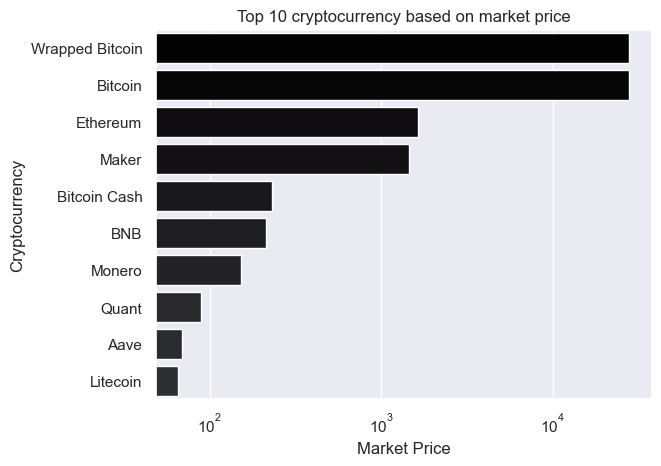

In [43]:
cpal=sns.color_palette("cubehelix",n_colors=64,desat=0.2)
sns.barplot(x="quote.USD.price", 
            y="name",
            data=top_10_cryptocurrency.head(10),
            orient="h",
            palette=cpal)
plt.title('Top 10 cryptocurrency based on market price')
plt.xlabel('Market Price')
plt.ylabel("Cryptocurrency")
plt.xscale('log')
plt.show()

In [20]:
# Top 10 cryptocurrency based on 24 hour volume
top_10_cryptocurrency_volume = top_10_cryptocurrency.sort_values("quote.USD.volume_24h", ascending=False)
top_10_cryptocurrency_volume.head(10)

,name,symbol,last_updated,quote.USD.price,quote.USD.volume_24h
2,Tether USDt,USDT,2023-10-07T00:35:00.000Z,1.00050,19164834649.29326
0,Bitcoin,BTC,2023-10-07T00:35:00.000Z,27919.53944,13588327252.03117
1,Ethereum,ETH,2023-10-07T00:35:00.000Z,1646.90408,4919194609.60926
5,USDC,USDC,2023-10-07T00:35:00.000Z,1.00005,2586367648.32753
4,XRP,XRP,2023-10-07T00:35:00.000Z,0.52552,680141529.84617
28,BUSD,BUSD,2023-10-07T00:35:00.000Z,1.00043,541685423.50593
6,Solana,SOL,2023-10-07T00:35:00.000Z,23.58701,401624453.59751
3,BNB,BNB,2023-10-07T00:35:00.000Z,213.76558,273636222.21591
12,Polygon,MATIC,2023-10-07T00:35:00.000Z,0.56956,244384586.48119
9,TRON,TRX,2023-10-07T00:35:00.000Z,0.08753,238684224.12024


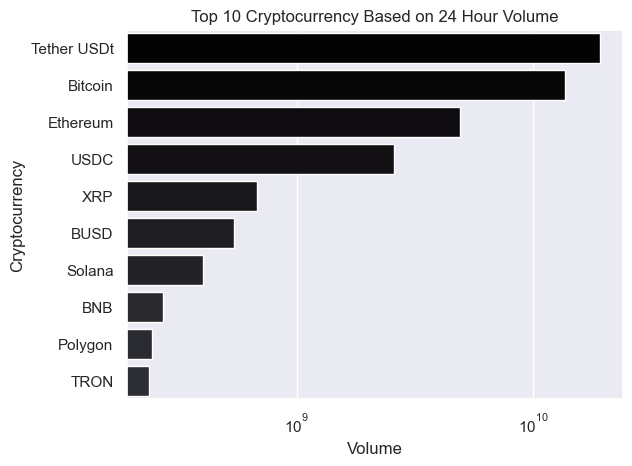

In [44]:
sns.barplot(x="quote.USD.volume_24h", 
            y="name",
            data=top_10_cryptocurrency_volume.head(10),
            orient="h", palette=cpal
            )
plt.title('Top 10 Cryptocurrency Based on 24 Hour Volume')
plt.xlabel('Volume')
plt.ylabel("Cryptocurrency")
plt.xscale('log')
plt.show()